In [1]:
##Recuperar lista de Atas disponíveis
import requests
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
from datetime import datetime


# URL da API do COPOM para pesquisa de ATAS disponíveis
url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/atas?quantidade=300"

response = requests.get(url)


# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Expande o resultado recorrente da API
    json_data = response.json()
    data_list = json_data.get('conteudo', [])  
    
    # Converte para DF
    df = pd.DataFrame(data_list)
    numero_atas = len(df)
    df.describe()
    
    

    
   
    #df.to_csv("ultimas_atas_comunicados.csv", index=False)
    #print("\nDados salvos em 'ultimas_atas_comunicados.csv'")
else:
    print(f"Erro na requisição: {response.status_code} - {response.text}")

A listagem de atas apresenta o número da reunião, em a data de referência ( data da efetivação da decisão), a data da publicação da ata e o título. Hoje a lista tem 253 registros, com a primeira reunião em 28 de Janeiro de 1998 e a última em 17 de Setembro de 2025. A primeira publicação ocorreu em 22 de Maio de 1998 e a última em 23 de Setembro de 2025.

In [2]:
df['dataPublicacao'] = pd.to_datetime(df['dataPublicacao'])
df['dataReferencia'] = pd.to_datetime(df['dataReferencia'])
df['prazoPublicacao'] = df['dataPublicacao'] - df['dataReferencia']
df['prazoPublicacao'] = df['prazoPublicacao'].dt.days
df.describe()

,nroReuniao,dataReferencia,dataPublicacao,prazoPublicacao
count,253.000000,253,253,253.000000
mean,147.000000,2010-09-12 02:39:22.055335936,2010-09-25 16:30:21.343873536,13.577075
min,21.000000,1998-01-28 00:00:00,1998-05-22 00:00:00,2.000000
25%,84.000000,2003-05-21 00:00:00,2003-05-28 00:00:00,6.000000
50%,147.000000,2009-12-09 00:00:00,2009-12-17 00:00:00,8.000000
75%,210.000000,2017-10-25 00:00:00,2017-10-31 00:00:00,8.000000
max,273.000000,2025-09-17 00:00:00,2025-09-23 00:00:00,155.000000
std,73.179004,NaN,NaN,24.986484


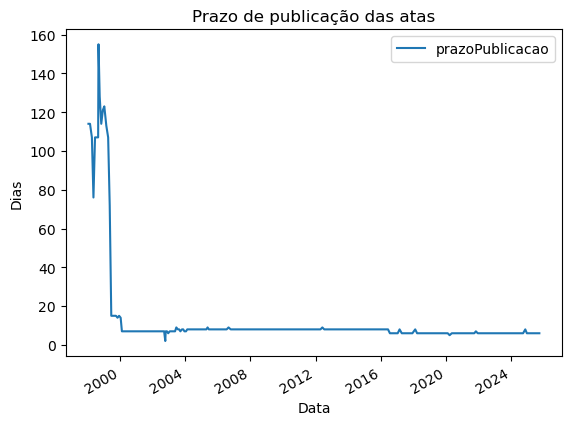

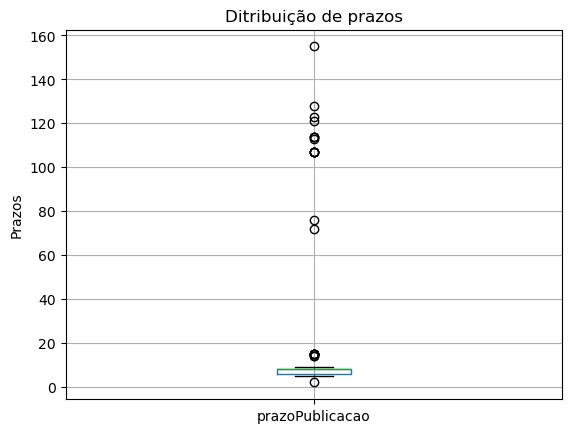

Prazo mínimo:  2
Prazo médio:  13.577075098814229
Prazo mediano:  8.0
Prazo máximo:  155


In [3]:
df.plot(x='dataReferencia', y='prazoPublicacao', kind='line')
plt.title('Prazo de publicação das atas')
plt.xlabel('Data')
plt.ylabel('Dias')
plt.show()
df.boxplot(column='prazoPublicacao')
plt.title('Ditribuição de prazos')
plt.ylabel('Prazos')
plt.show()



print("Prazo mínimo: ", df['prazoPublicacao'].min())
print("Prazo médio: ", df['prazoPublicacao'].mean())
print("Prazo mediano: ", df['prazoPublicacao'].median())
print("Prazo máximo: ", df['prazoPublicacao'].max())

Existe uma mudança clara de comportamento nos prazos publicação das atas. A partir desse resultado foi pesquisada a história do BC e vemos que a rerução de przos coincide com a autonomia do BC e a criação de regime de metas de inflação em Junho de 1999. Para o presente estudo passaremos a utilizar as reuniões posteriores a essa alteração somente.

In [4]:

df1999 = df[df['dataReferencia'] > pd.to_datetime('1999-06-01')]
df1999.describe()



,nroReuniao,dataReferencia,dataPublicacao,prazoPublicacao
count,238.000000,238,238,238.000000
mean,154.500000,2011-06-14 20:10:05.042016768,2011-06-22 06:39:19.663865600,7.436975
min,36.000000,1999-06-23 00:00:00,1999-07-08 00:00:00,2.000000
25%,95.250000,2004-04-22 18:00:00,2004-04-30 18:00:00,6.000000
50%,154.500000,2010-11-13 12:00:00,2010-11-21 12:00:00,8.000000
75%,213.750000,2018-05-02 00:00:00,2018-05-08 00:00:00,8.000000
max,273.000000,2025-09-17 00:00:00,2025-09-23 00:00:00,15.000000
std,68.848868,NaN,NaN,1.672002


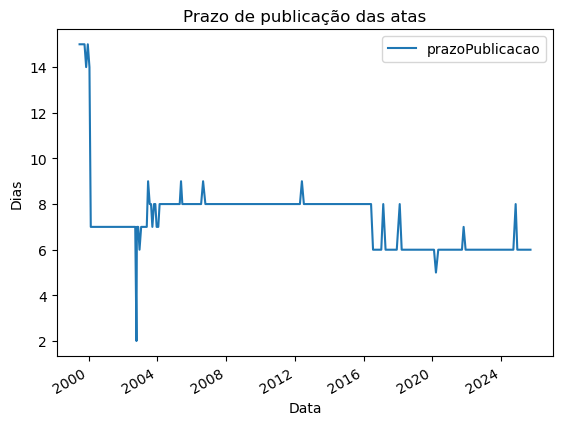

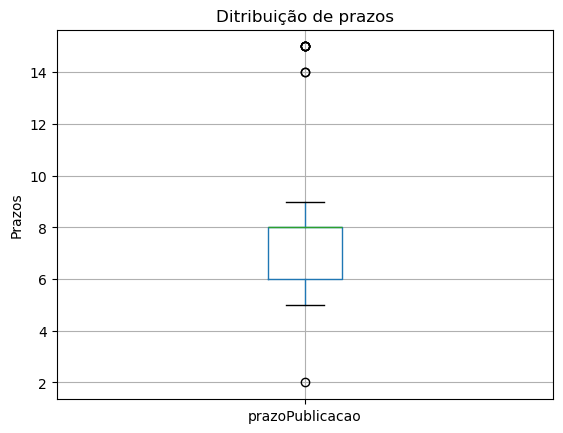

Prazo mínimo:  2
Prazo médio:  7.436974789915967
Prazo mediano:  8.0
Prazo máximo:  15


In [5]:
df1999.plot(x='dataReferencia', y='prazoPublicacao', kind='line')
plt.title('Prazo de publicação das atas')
plt.xlabel('Data')
plt.ylabel('Dias')
plt.show()
df1999.boxplot(column='prazoPublicacao')
plt.title('Ditribuição de prazos')
plt.ylabel('Prazos')
plt.show()



print("Prazo mínimo: ", df1999['prazoPublicacao'].min())
print("Prazo médio: ", df1999['prazoPublicacao'].mean())
print("Prazo mediano: ", df1999['prazoPublicacao'].median())
print("Prazo máximo: ", df1999['prazoPublicacao'].max())

A base filtrada tem 238 registros, com início em Junho de 1999 e tendo todas as atas sujeitas à regulção atual.

In [6]:
#Formando a base de atas e comunicados
# Colunas da ata: nroReuniao dataReferencia dataPublicacao titulo textoAta
    
#Colunas do comunicado: nro_reuniao dataReferencia titulo textoComunicado

colunas_unidas = ['nroReuniao','dataReferencia','dataPublicacao','tituloAta','textoAta','tituloComunicado','textoComunicado']

df_copom = pd.DataFrame(columns=colunas_unidas)
#for i in range(230,200,-1):
for i in range(len(df1999)-1,-1,-1):
    este_nro = df1999.iloc[i]['nroReuniao']


    print("Reuniões a computar: ", i,"  ", end='\r', flush=True)

####Inicio do bloco ata
    #Carrega campos da ata para a reunião
    ata_url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/atas_detalhes?nro_reuniao=" + str(este_nro)
    response = requests.get(ata_url)

    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Expande o resultado recorrente da API
        json_data = response.json()
        ata_data_list = json_data.get('conteudo', [])  
          
        # Converte para DF
        df_ata = pd.DataFrame(ata_data_list)

    else:
        print(f"Erro na requisição: {response.status_code} - {response.text}")
####Fim do bloco ata

####Inicio do bloco comunicado
    com_url = "https://www.bcb.gov.br/api/servico/sitebcb/copom/comunicados_detalhes?nro_reuniao=" + str(este_nro)
    response = requests.get(com_url)
    
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Expande o resultado recorrente da API
        json_data = response.json()
        com_data_list = json_data.get('conteudo', [])  
        
        # Converte para DF
        df_com = pd.DataFrame(com_data_list)

        
    else:
        print(f"Erro na requisição: {response.status_code} - {response.text}")





####Fim do bloco comunicado    

    # Colunas da ata: nroReuniao dataReferencia dataPublicacao titulo textoAta
    
    #Colunas do comunicado: nro_reuniao dataReferencia titulo textoComunicado

    df_linha_copom = pd.DataFrame(columns=colunas_unidas)

    df_linha_copom.at[0,'nroReuniao'] = df_ata.iloc[0]['nroReuniao']
    df_linha_copom.at[0,'dataReferencia'] = df_ata.iloc[0]['dataReferencia']
    df_linha_copom.at[0,'dataPublicacao'] = df_ata.iloc[0]['dataPublicacao']
    df_linha_copom.at[0,'tituloAta'] = df_ata.iloc[0]['titulo']
    df_linha_copom.at[0,'textoAta'] = df_ata.iloc[0]['textoAta']
    if (len(df_com)>0):
        df_linha_copom.at[0,'tituloComunicado'] = df_com.iloc[0]['titulo']
        df_linha_copom.at[0,'textoComunicado'] = df_com.iloc[0]['textoComunicado']


    df_copom = pd.concat([df_copom, df_linha_copom], ignore_index=True)

df_copom.head()    
df_copom.tail()  

Reuniões a computar:  0     

,nroReuniao,dataReferencia,dataPublicacao,tituloAta,textoAta,tituloComunicado,textoComunicado
233,269,2025-03-19,2025-03-25,"269ª Reunião - 18-19 março, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 14,25% a.a.","<div class=""ExternalClassAE4A4113CD704413AF90A..."
234,270,2025-05-07,2025-05-13,"270ª Reunião - 6-7 maio, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 14,75% a.a.","<div class=""ExternalClassB27C33A0668D4D38BE755..."
235,271,2025-06-18,2025-06-24,"271ª Reunião - 17-18 junho, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom eleva a taxa Selic para 15,00% a.a.","<div class=""ExternalClass276B5992DAD145FD92ED7..."
236,272,2025-07-30,2025-08-05,"272ª Reunião - 29-30 julho, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom mantém a taxa Selic em 15,00% a.a.","<div class=""ExternalClass1BE7096A76144A1BB7BCE..."
237,273,2025-09-17,2025-09-23,"273ª Reunião - 16-17 setembro, 2025","<div id=""atacompleta""><div id=""ataconteudo""><h...","Copom mantém a taxa Selic em 15,00% a.a.","<div class=""ExternalClass89BEC3FC87B24E52A58CC..."


In [7]:
df_copom['tamTextoAta'] = df_copom['textoAta'].str.len()
df_copom['tamTextoComunicado'] = df_copom['textoComunicado'].str.len()
df_copom.head()    

,nroReuniao,dataReferencia,dataPublicacao,tituloAta,textoAta,tituloComunicado,textoComunicado,tamTextoAta,tamTextoComunicado
0,36,1999-06-23,1999-07-08,36ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,55016.0,NaN
1,37,1999-07-28,1999-08-12,37ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,21833.0,NaN
2,38,1999-09-01,1999-09-16,38ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,26462.0,NaN
3,39,1999-09-22,1999-10-07,39ª Reunião (Extraordinária),\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,23271.0,NaN
4,40,1999-10-06,1999-10-21,40ª Reunião,\n\n \n <p><strong>Sum&aacute;rio</strong>...,NaN,NaN,21048.0,NaN


Tamanho mínimo das atas:  9177.0
Tamanho máximo das atas:  85056.0
Tamanho médio das atas:  46994.7572815534
Tamanho mediano das atas:  48215.0


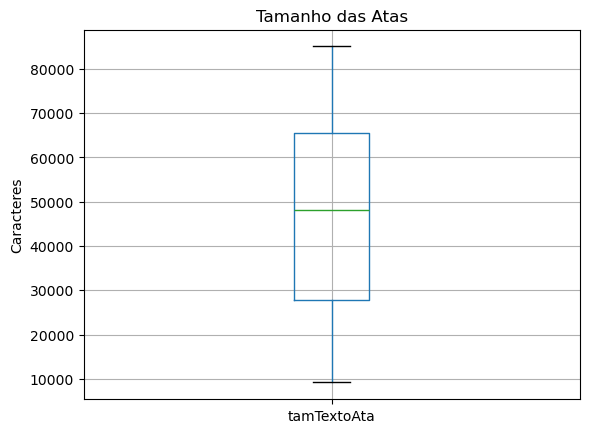

Tamanho mínimo dos comunicados:  99.0
Tamanho máximo dos comunicados:  7254.0
Tamanho médio dos comunicados:  2098.5526315789475
Tamanho mediano dos comunicados:  560.5


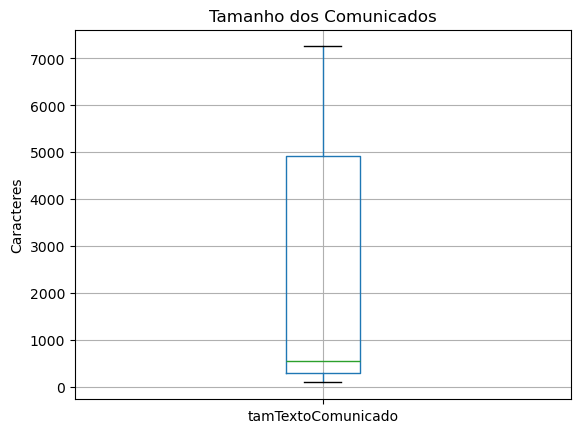

In [8]:
print("Tamanho mínimo das atas: ", df_copom['tamTextoAta'].min())
print("Tamanho máximo das atas: ", df_copom['tamTextoAta'].max())
print("Tamanho médio das atas: ", df_copom['tamTextoAta'].mean())
print("Tamanho mediano das atas: ", df_copom['tamTextoAta'].median())

df_copom.boxplot(column='tamTextoAta')
plt.title('Tamanho das Atas')
plt.ylabel('Caracteres')
plt.show()

print("Tamanho mínimo dos comunicados: ", df_copom['tamTextoComunicado'].min(skipna=True))
print("Tamanho máximo dos comunicados: ", df_copom['tamTextoComunicado'].max(skipna=True))
print("Tamanho médio dos comunicados: ", df_copom['tamTextoComunicado'].mean(skipna=True))
print("Tamanho mediano dos comunicados: ", df_copom['tamTextoComunicado'].median(skipna=True))

df_copom.boxplot(column='tamTextoComunicado')
plt.title('Tamanho dos Comunicados')
plt.ylabel('Caracteres')
plt.show()



O conteúdo das atas e comunicados é texto com formatação HTML. As atas tem em média aproximada de 47.000 caracteres enquanto os comunicados tem en média aproximadamente 6.170 caracteres. Ambos os conteúdos precisam ser tratados para remoção de tags e outros caracteres especiais conforme os requerimentos do modelo selecionado.
Os comunicados começaram a ser publicados a partir da reunião 46, em 26 de abril de 2100. Para reuniões anteriores só exitem atas.